# **Project: Insurance Charge Prediction**

In this project we are working on an insurance dataset, here our aim is to find out the insurance charge of a person using different features or behaviors of a person.
So in this way, we can say that this is a Regression model. Here we also use VIF for a feature selection.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
insurance=pd.read_csv('/content/drive/MyDrive/Intellipaath Dataset/Insurance Charges/new_insurance_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Apply EDA (Exploratory Data Analysis)

In [ ]:
insurance.head(30)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.543130,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.674370,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.627590,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.393320,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.859410,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
5,18.0,male,34.430,0.0,no,26488.339120,20.0,717162.0,3.696161e+06,0.0,NaN,southeast,1137.46970
6,18.0,male,37.290,0.0,no,33217.365480,13.0,699159.0,8.765292e+05,0.0,6.906067e+07,southeast,1141.44510
7,18.0,male,41.140,0.0,no,46770.585330,12.0,706423.0,4.486741e+06,0.0,9.719378e+07,southeast,1146.79660
8,18.0,male,43.010,0.0,no,9715.650411,17.0,NaN,9.216440e+06,0.0,5.888197e+07,southeast,1149.39590
9,18.0,male,53.130,0.0,no,17046.585150,19.0,704425.0,1.458972e+06,0.0,9.426182e+07,southeast,1163.46270


In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
insurance.isnull()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
insurance.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [ ]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
col=list(insurance.columns)

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
type(col)

list

In [ ]:
insurance['smoker'].mode()

0    no
Name: smoker, dtype: object

In [ ]:
insurance['smoker'].mode()[0]

'no'

In [ ]:
insurance['children'].mean()

1.0907726931732933

In [ ]:
insurance['age'].mean()

39.31000752445448

In [ ]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

# Fill Null values using Mean and Mod

In [ ]:
for col_name in col:
    if insurance[col_name].dtypes=='object':
        #print('ob')
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mode()[0])
    else:
        #print('num')
        insurance[col_name] = insurance[col_name].fillna(insurance[col_name].mean())

In [ ]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance['age'].dtype

dtype('float64')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

# Visualize the Data

In [ ]:
#seaborn

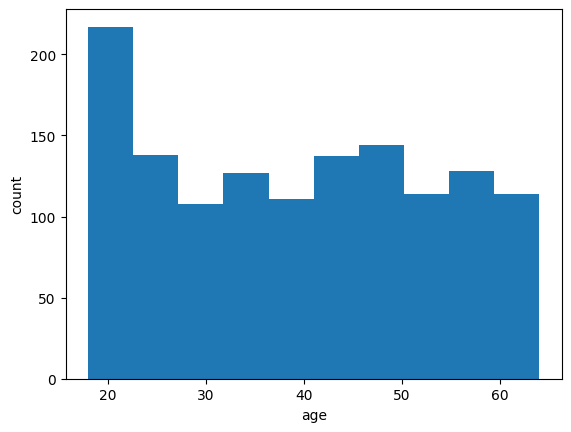

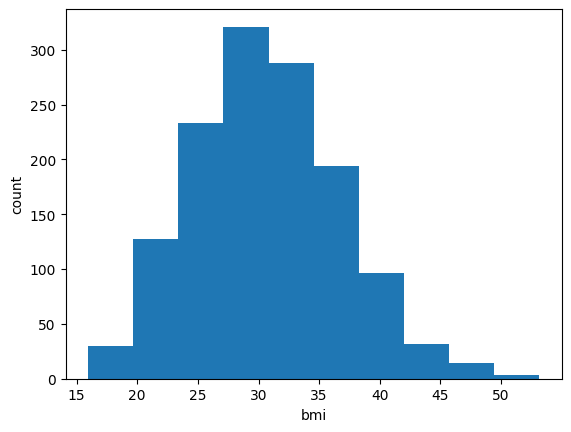

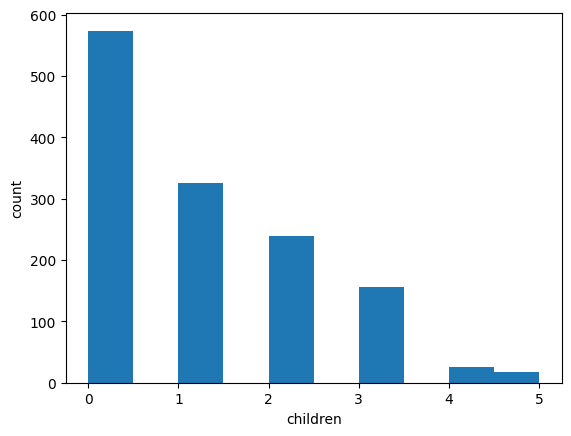

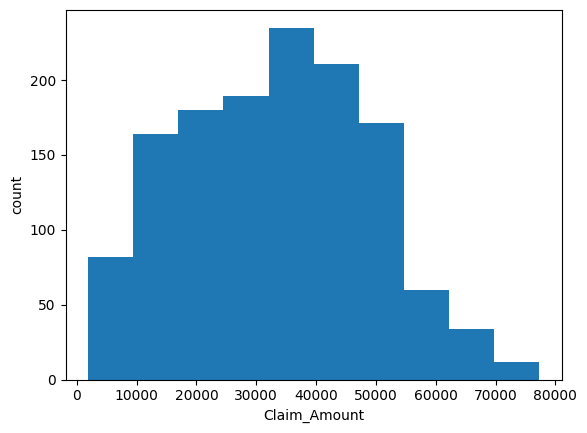

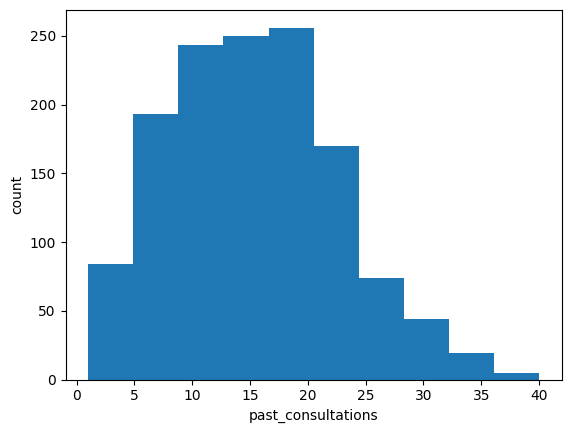

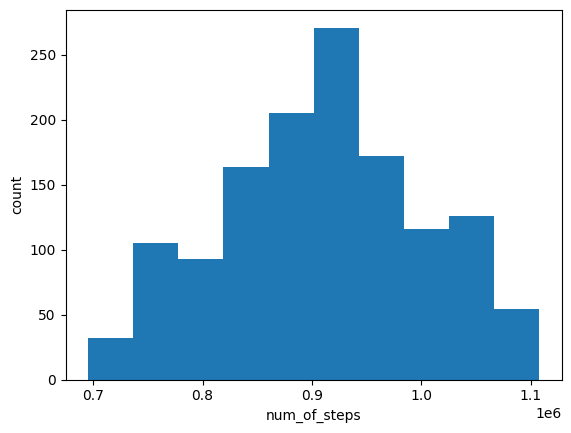

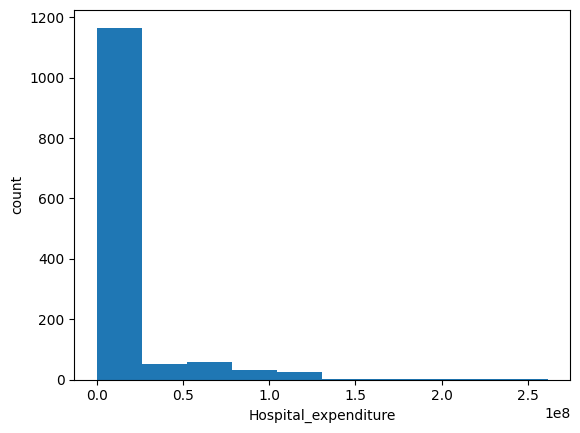

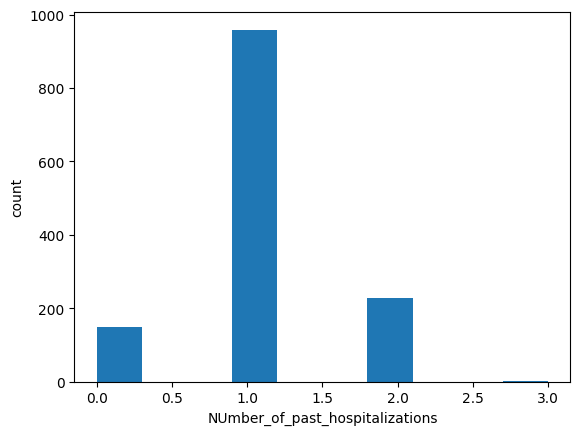

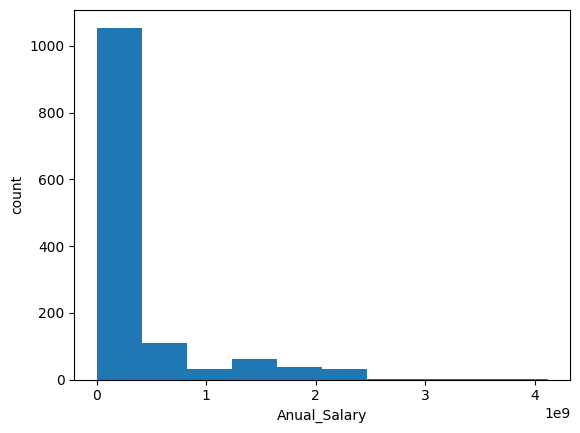

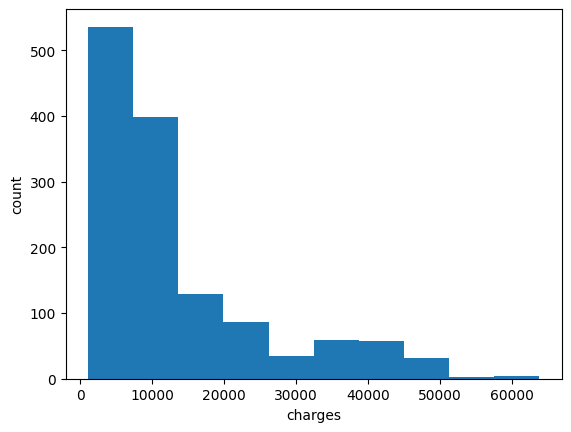

In [ ]:
for col_name in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.hist(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

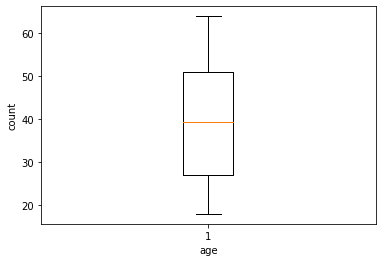

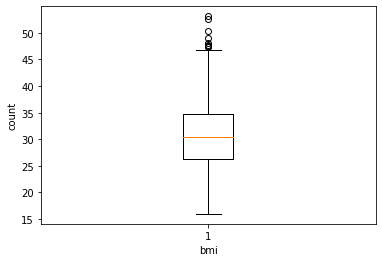

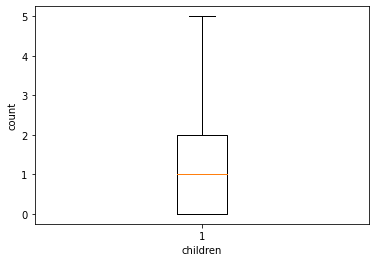

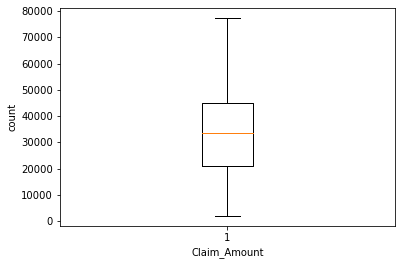

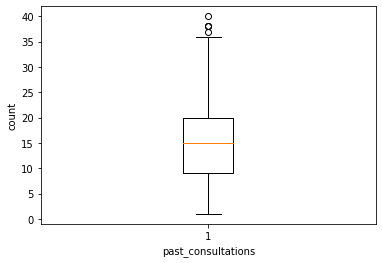

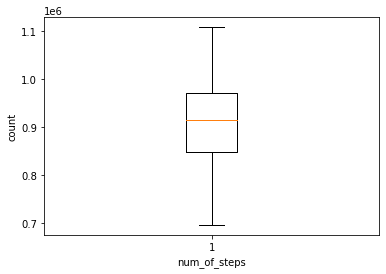

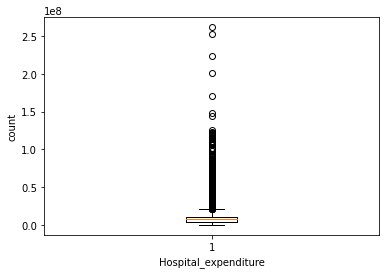

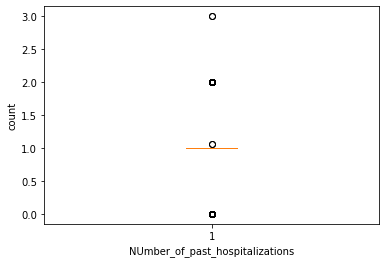

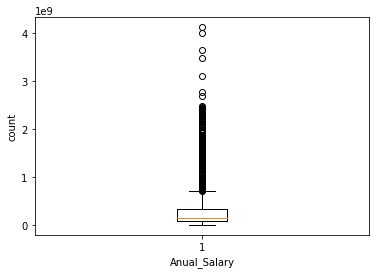

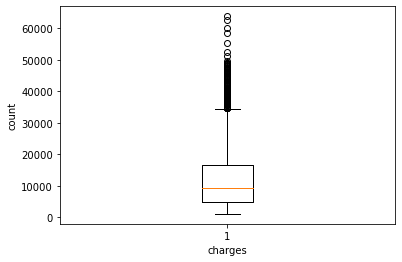

In [ ]:
for col_name in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
insurance.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,13.987500,6.094840,1.199606,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.310008,30.400000,1.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
#treating outliers

In [ ]:
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)

In [ ]:
Q1

26.315

In [ ]:
Q3

34.65625

In [ ]:
IQR = Q3 - Q1
IQR

8.341249999999999

In [ ]:
Q1 - 1.5*IQR

13.803125000000003

In [ ]:
Q3 + 1.5*IQR

47.168124999999996

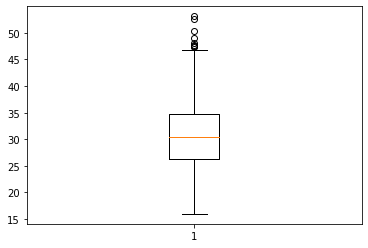

In [ ]:
plt.boxplot(insurance['bmi'])
plt.show()

In [ ]:
#insurance[(insurance['sex']=='male') & (insurance['smoker']=='no')]

# Remove the outlayers using boxplot

In [ ]:

Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.bmi >= Q1 - 1.5*IQR) & (insurance.bmi <= Q3 + 1.5*IQR)]

Q1 = insurance.past_consultations.quantile(0.25)
Q3 = insurance.past_consultations.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.past_consultations >= Q1 - 1.5*IQR) & (insurance.past_consultations <= Q3 + 1.5*IQR)]

Q1 = insurance.Hospital_expenditure.quantile(0.25)
Q3 = insurance.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Hospital_expenditure >= Q1 - 1.5*IQR) & (insurance.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = insurance.Anual_Salary.quantile(0.25)
Q3 = insurance.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Anual_Salary >= Q1 - 1.5*IQR) & (insurance.Anual_Salary <= Q3 + 1.5*IQR)]


In [ ]:
insurance.shape

(1030, 13)

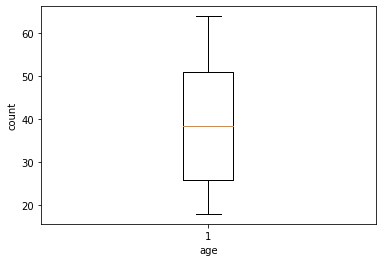

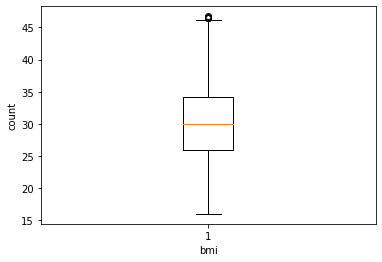

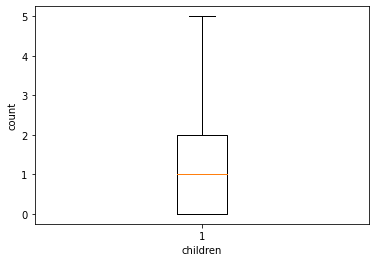

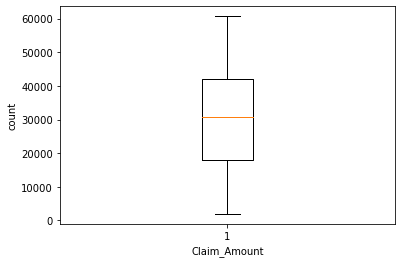

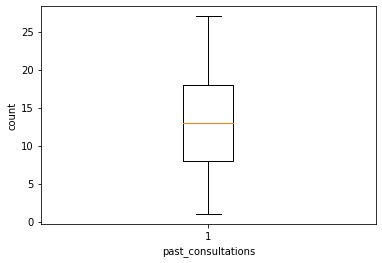

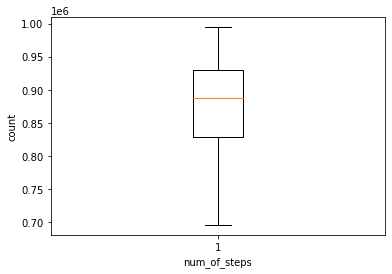

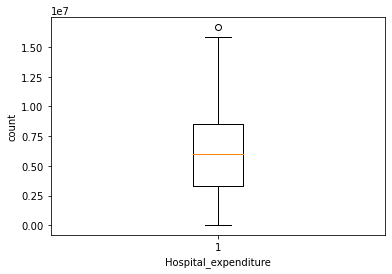

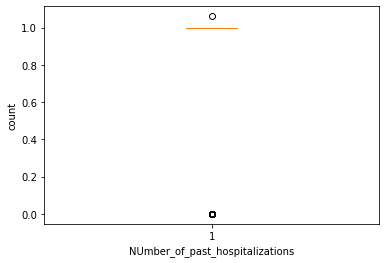

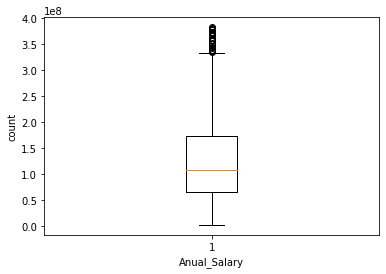

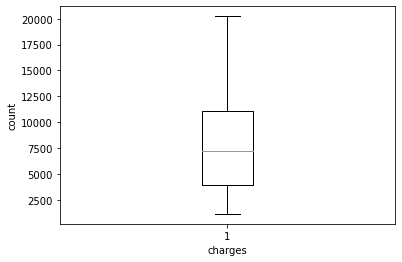

In [ ]:
for col_name in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
insurance.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [ ]:
insurance.shape

(1030, 13)

In [ ]:
#age, date of birth, 10th_year, 12th_year,--- anual expediture of the customer

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#corelation
#age, gender,----
#charges

In [ ]:
#multi-colinearirity== 5 or 6
#age, gender, dob, ----
#charges

# Feature Selection  
   Apply VIF (variance infleaction techniques) techniques for feature selection and in which VIF value is less than 6 we take only that features for model building.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)

In [ ]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [ ]:
X = insurance[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [ ]:
X.values

array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [3.10000000e+01, 2.98100000e+01, 0.00000000e+00, ...,
        1.02899068e+07, 1.00000000e+00, 3.74530951e+08],
       [4.30000000e+01, 2.00450000e+01, 2.00000000e+00, ...,
        1.08303011e+07, 1.00000000e+00, 3.69684860e+08],
       [3.50000000e+01, 2.80250000e+01, 0.00000000e+00, ...,
        1.24774431e+07, 1.00000000e+00, 3.69684860e+08]])

In [ ]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6
7
8


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [ ]:
len(X.columns)

9

In [ ]:
insurance=insurance.drop(['num_of_steps'], axis = 1)

In [ ]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [ ]:
insurance=insurance.drop(['age'], axis=1)

In [ ]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                           feature        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [ ]:
insurance=insurance.drop(['bmi'], axis=1)

In [ ]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                           feature       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [ ]:
insurance=insurance.drop(['NUmber_of_past_hospitalizations'], axis=1)

Here all the features VIF value is less than 5 so we take these features

In [ ]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

# value<6

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [ ]:
x=insurance.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=insurance.iloc[:,-1]

In [ ]:
insurance.head()


,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,male,0.0,no,29087.54313,17.0,4720920.992,55784970.05,southeast,1121.8739
1,male,0.0,no,39053.67437,7.0,4329831.676,13700885.19,southeast,1131.5066
2,male,0.0,no,39023.62759,19.0,6884860.774,73523107.27,southeast,1135.9407
3,male,0.0,no,28185.39332,11.0,4274773.550,75819679.60,southeast,1136.3994
4,male,0.0,no,14697.85941,16.0,3787293.921,23012320.01,southeast,1137.0110


Here we split the data

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)
#how to split the data?
#100%---> 80% train and 20% test
# xtrain,xtest,ytrain,ytest= train_test_split(data,train_size/test_size)
#train_size should be more
#random_state--> pattern
#example
# 1,2,3,4,5,6
# 3,4,6
# 1,5,6
# 1,2,3----> without random_state

# 1,3,6
# 1,3,6
# 1,3,6
#rs=0/1/100

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 5)
(824,)
(206, 5)
(206,)


In [ ]:
x_train , y_train, x_test, y_test

(     children  Claim_Amount  past_consultations  Hospital_expenditure  \
 746       0.0  25238.363470                11.0          2.086869e+06   
 641       0.0  37222.476360                 9.0          6.062378e+06   
 999       1.0  30825.190070                11.0          5.923489e+06   
 281       0.0   9560.754493                15.0          3.185350e+06   
 802       2.0  12992.139950                24.0          4.075903e+06   
 ..        ...           ...                 ...                   ...   
 279       1.0  20150.675120                 9.0          1.747107e+05   
 768       0.0   9582.708574                11.0          1.046259e+07   
 841       0.0  31405.793590                12.0          9.380141e+06   
 561       2.0   9816.604000                12.0          8.134594e+05   
 688       0.0  55041.113080                16.0          9.347759e+06   
 
      Anual_Salary  
 746  1.649883e+08  
 641  9.657123e+07  
 999  3.029514e+08  
 281  7.490390e+07  
 802 

Now i am going to building the Model

In [ ]:
l_model=LinearRegression()
#building the model

In [ ]:
l_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions=l_model.predict(x_test)

In [ ]:
l1 = [[20,30,40,50,60]]
x = l_model.predict(l1)
x

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7928.9859048])

In [ ]:
predictions

array([ 7410.79368293, 10525.46032915,  4225.68186835, 11784.67064226,
        9710.44769939,  2920.28422479,  7675.02920952,  3974.05235592,
        1998.90729711,  1644.33779821,  9355.99422159,  6212.23827286,
        7039.69058406,  6913.4106462 ,  7297.05052731,  8116.21854338,
        5359.21098611, 11610.94654975, 10731.85265303,  4125.98535049,
        4978.27582414,  7076.11959566,  5297.22536168, 10517.54532016,
        7970.32302538,  9134.27913297,  3195.07752332,  2030.84851755,
        7974.53183192,  6784.21935489,  9063.13892274,  9603.83277346,
        7310.54589067,  3127.05229652, 10815.26325585,  6390.86195988,
        2959.6122486 ,  5861.07915275,  8191.78215091,  3550.84253839,
        2770.66188065,  7533.68996882,  9234.00165879,  4599.21923178,
        7080.4581291 ,  6040.26489711,  9148.59452643,  9621.34374208,
        1845.77904491,  4786.94915214, 10787.39907085, 10725.71531506,
       10417.07991618,  4695.22528891,  7214.06291724,  4625.56717868,
      

In [ ]:
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

In [ ]:
error_pred

,Actual_data,Prediction_data


In [ ]:
error_pred['Actual_data']=y_test
#professor ans key

In [ ]:
error_pred

,Actual_data,Prediction_data
752,10704.47000,NaN
723,10197.77220,NaN
177,2801.25880,NaN
834,11848.14100,NaN
718,10107.22060,NaN
...,...,...
627,8688.85885,NaN
993,16085.12750,NaN
426,5976.83110,NaN
895,12925.88600,NaN


In [ ]:
error_pred['Prediction_data']=predictions
# ans given by kid

In [ ]:
error_pred.head()

,Actual_data,Prediction_data
752,10704.4700,7410.793683
723,10197.7722,10525.460329
177,2801.2588,4225.681868
834,11848.1410,11784.670642
718,10107.2206,9710.447699


In [ ]:
error_pred.shape

(206, 2)

In [ ]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [ ]:
error_pred.head()

,Actual_data,Prediction_data,Error
752,10704.4700,7410.793683,3293.676317
723,10197.7722,10525.460329,-327.688129
177,2801.2588,4225.681868,-1424.423068
834,11848.1410,11784.670642,63.470358
718,10107.2206,9710.447699,396.772901


Now we check the accuracy of the Model

In [ ]:
from sklearn.metrics import *

In [ ]:
train_predict=l_model.predict(x_train)
train_predict

array([ 8636.77102077,  5889.89113882, 15510.15506332,  4534.92941326,
       11476.89239221,  4790.24544067,  2226.4301962 , 14580.40311237,
       18281.06573486,  5779.13917532,  9971.98821712,  8280.80960393,
       12273.87781544, 17551.84469935,  2094.55275059,  5142.38710765,
       12387.39416342,  6423.03514024,  9022.97286232,  5124.91472945,
       15186.68881153,  3390.02964113,  7783.52737648, 12373.40805558,
        7044.87450697, 12537.01546367,  1984.92004358,  5292.93806287,
        5677.81955858,  6669.72484715, 18550.08823458, 12171.85956404,
        3015.25403533,  5723.10604429,  1893.90076271,  4878.70389424,
       10253.08347322,  6787.55544862,  4519.08995661,  5930.20374602,
        8546.66285509,  3020.70144388,  7596.74648983,  4651.49079174,
        8319.6957918 , 11814.77524627, 18159.61248909,  5380.4824588 ,
       10795.88105083,  9205.23720252, 12884.63090351,  2313.04971677,
        2290.56603928,  3408.29277406,  3780.0987899 ,  2099.40617415,
      

In [ ]:
r2_on_test=r2_score(y_test, predictions)
r2_on_test

0.8436003409638432

Here we get 84 percent accuracy so we can say it is a good Mode.